In [1]:
import pandas_datareader as pdr  # to install: !pip install pandas_datareader
import pandas as pd
from datetime import datetime
import os
import eda
import numpy as np
from outlier_report import outlier_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index_points = pd.read_csv('input_data/market_index_return.csv')

In [3]:
crypto_prices = pd.read_csv('input_data/cryptos_return.csv')

## EDA for index_points

***********EDA for index_points***********

***********First five rows***********
    tic        Date     Adj Close    return
0  DJ30  2019-03-01  26026.320312       NaN
1  DJ30  2019-03-04  25819.650391 -0.007941
2  DJ30  2019-03-05  25806.630859 -0.000504
3  DJ30  2019-03-06  25673.460938 -0.005160
4  DJ30  2019-03-07  25473.230469 -0.007799

***********Last five rows***********
         tic        Date    Adj Close    return
1089  S&P500  2021-04-26  4187.620117  0.001782
1090  S&P500  2021-04-27  4186.720215 -0.000215
1091  S&P500  2021-04-28  4183.180176 -0.000846
1092  S&P500  2021-04-29  4211.470215  0.006763
1093  S&P500  2021-04-30  4181.169922 -0.007195

Shape: (1094, 4)

Numeric columns: ['Adj Close', 'return']

Non-numeric columns: ['tic', 'Date']

Unique Values of ['tic']:
['DJ30' 'S&P500']

Missing values:
     tic missed: 0
     Date missed: 0
     Adj Close missed: 0
     return missed: 1

Outliers:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,max_z_abs
return,"1,092",-0.00,1.00,-7.98,-3.06,-1.48,-0.31,0.03,0.38,1.12,2.99,6.93,7.98
Adj Close,"1,094",-0.00,1.00,-1.07,-1.04,-1.02,-1.00,-0.32,0.95,1.29,1.49,1.52,1.52


There are 1 variables that contain outliers. Red cells represent outliers.

Visualization:


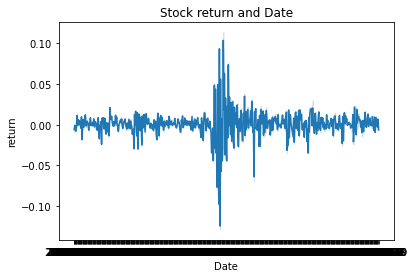

In [4]:
print("***********EDA for index_points***********")
print()
print("***********First five rows***********")
print(index_points.head())
print()
print("***********Last five rows***********")
print(index_points.tail())
print()
print("Shape:",index_points.shape)
print()
print("Numeric columns:",index_points.select_dtypes(include = np.number).columns.to_list())
print()
print("Non-numeric columns:",index_points.select_dtypes(exclude = np.number).columns.to_list())
# unique
print()
print("Unique Values of ['tic']:")
print(index_points['tic'].unique())
# missing values
print()
print("Missing values:")
missing = 0
for co in index_points.columns:
    if index_points[co].isnull().sum() > 0:
        missing = missing +1
    print('    ',co,'missed:', missing)
print()
# outliers
print("Outliers:")
vars_to_check = ['Adj Close', 'return']
vars_with_big_outliers = list(outlier_report(index_points,vars_to_check,thres=4,return_df=True,no_print=True)
                              .query('max_z_abs > 5').index)
outlier_report(index_points,vars_to_check,thres=4)
print('There are',len(vars_with_big_outliers), 'variables that contain outliers. Red cells represent outliers.')
print()
# visualization
print("Visualization:")
date_ret = sns.lineplot(data = index_points, x = 'Date', y = 'return')
plt.title("Stock return and Date")
plt.show()

## EDA for crypto_prices

***********EDA for crypto_prices***********

***********First five rows***********
       tic        Date  Adj Close    return
0  ADA-USD  2019-03-01   0.043279       NaN
1  ADA-USD  2019-03-02   0.042838 -0.010190
2  ADA-USD  2019-03-03   0.042312 -0.012279
3  ADA-USD  2019-03-04   0.040602 -0.040414
4  ADA-USD  2019-03-05   0.043212  0.064283

***********Last five rows***********
          tic        Date  Adj Close    return
7885  XRP-USD  2021-04-27   1.400955  0.023711
7886  XRP-USD  2021-04-28   1.358601 -0.030232
7887  XRP-USD  2021-04-29   1.399360  0.030001
7888  XRP-USD  2021-04-30   1.591674  0.137430
7889  XRP-USD  2021-05-01   1.651025  0.037288

Shape: (7890, 4)

Numeric columns: ['Adj Close', 'return']

Non-numeric columns: ['tic', 'Date']

Unique Values of ['tic']:
['ADA-USD' 'BCH-USD' 'BNB-USD' 'BTC-USD' 'DOGE-USD' 'ETH-USD' 'LINK-USD'
 'LTC-USD' 'USDT-USD' 'XRP-USD']

Missing values:
     tic missed: 0
     Date missed: 0
     Adj Close missed: 0
     return missed: 1

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,max_z_abs
return,"7,880",-0.00,1.00,-7.18,-2.01,-1.13,-0.34,-0.07,0.26,1.28,2.73,42.54,42.54
Adj Close,"7,890",0.00,1.00,-0.25,-0.25,-0.25,-0.25,-0.25,-0.22,1.21,6.72,9.33,9.33


There are 2 variables that contain outliers. Red cells represent outliers.

Visualization:


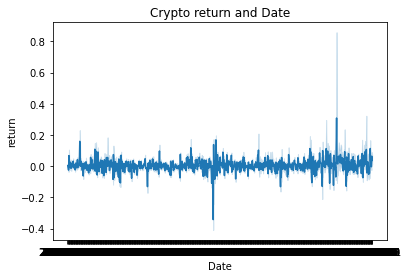

In [5]:
print("***********EDA for crypto_prices***********")
print()
print("***********First five rows***********")
print(crypto_prices.head())
print()
print("***********Last five rows***********")
print(crypto_prices.tail())
print()
print("Shape:",crypto_prices.shape)
print()
print("Numeric columns:",crypto_prices.select_dtypes(include = np.number).columns.to_list())
print()
print("Non-numeric columns:",crypto_prices.select_dtypes(exclude = np.number).columns.to_list())
# unique
print()
print("Unique Values of ['tic']:")
print(crypto_prices['tic'].unique())
# missing values
print()
print("Missing values:")
missing = 0
for co in crypto_prices.columns:
    if crypto_prices[co].isnull().sum() > 0:
        missing = missing +1
    print('    ',co,'missed:', missing)
print()
# outliers
print("Outliers:")
vars_to_check = ['Adj Close', 'return']
vars_with_big_outliers = list(outlier_report(crypto_prices,vars_to_check,thres=4,return_df=True,no_print=True)
                              .query('max_z_abs > 5').index)
outlier_report(crypto_prices,vars_to_check,thres=4)
print('There are',len(vars_with_big_outliers), 'variables that contain outliers. Red cells represent outliers.')
print()
# visualization
print("Visualization:")
date_ret = sns.lineplot(data = crypto_prices, x = 'Date', y = 'return')
plt.title("Crypto return and Date")
plt.show()

## Analysis for EDA 

- Our data sourcces 

    - Yahoo Finance 
    
- How we acquired the data 

    - `market_index_return.csv` 
       - Set up  `start_time` and `end_time`
       - Use the `.get_data_yahoo` to load data 
       - Use the `.pct_change()` to calculate return 
       - Save as csv file

    - `crypto_return.csv`
       - Create a list with TOP 10 company names
       - Set up `start_time` and `end_time`
       - Use the `.get_data_yahoo` to load data 
       - Use the `.pct_change()` to calculate return 
       - Save as csv file
       
- Observations from our EDA above

    - EDA for index_points
       - The volatility from March to April 2020 was significant during the period, with unprecedented returns in positive and negative values
       - The variable `return` has outliers, with -7.99 to the minimum and 6.94 to the maximum
       
    - EDA for crypto_prices 
       - The crypto return in March 2020 declined sharply, with significantly negative number compared to the others
       - The crypto return in February 2021 increased extremely, reaching a peak during the time span
       - The variable `return` has outliers, with -7.18 to the minimum and 42.53 to the maximum
       - The variable `Adj close` has outliers, with -0.25 to the minimum and 9.37 to the maximum

